# Data Investigation - Stations

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
font = {'size'   : 50}
matplotlib.rc('font', **font)

LABEL_FONT_SIZE = 15
TITLE_FONT_SIZE = 25

## Key Dates

In [4]:
FIRST_SERVICE_DATE = datetime.datetime.strptime('2013-08-29', '%Y-%m-%d')
LAST_SERVICE_DATE  = datetime.datetime.strptime('2016-08-31', '%Y-%m-%d')

## Import Data

In [5]:
print('Loading Station Data...')

try:
    file_path_slug = '../../../datasets/bayareabikeshare/*_station_data.csv'
    file_list = glob(file_path_slug)

    station_01 = pd.DataFrame()
    station_02 = pd.DataFrame()
    station_03 = pd.DataFrame()
    station_04 = pd.DataFrame()

    counter = 1


    for file in file_list:
        
        chunks = []
            
        for chunk in pd.read_csv(file, chunksize=10000, iterator=True):
            chunk.columns = ['station_id', 'name', 'lat', 'long', 'dock_count', 'landmark', 'first_service_date']            
            chunks.append(chunk)
        print('\tFinished file! (%d of %d)' % (counter, len(file_list)))
        
        if counter == 1:
            station_01 = pd.concat(chunks)
        elif counter == 2:
            station_02 = pd.concat(chunks)
        elif counter == 3:
            station_03 = pd.concat(chunks)
        elif counter == 4:
            station_04 = pd.concat(chunks)
        else:
            pass        

        counter += 1

    print('Data Loaded Successfully!')
except:
    print('oops... something went wrong importing the data :(')

Loading Station Data...
	Finished file! (1 of 4)
	Finished file! (2 of 4)
	Finished file! (3 of 4)
	Finished file! (4 of 4)
Data Loaded Successfully!


## Preview loaded data

In [6]:
station_01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
station_id            70 non-null int64
name                  70 non-null object
lat                   70 non-null float64
long                  70 non-null float64
dock_count            70 non-null int64
landmark              70 non-null object
first_service_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ KB


In [7]:
station_01.head(5)

,station_id,name,lat,long,dock_count,landmark,first_service_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [8]:
station_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69 entries, 0 to 68
Data columns (total 7 columns):
station_id            69 non-null int64
name                  69 non-null object
lat                   69 non-null float64
long                  69 non-null float64
dock_count            69 non-null int64
landmark              69 non-null object
first_service_date    69 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 4.3+ KB


In [9]:
station_02.head(5)

,station_id,name,lat,long,dock_count,landmark,first_service_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [10]:
station_03.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 991
Data columns (total 7 columns):
station_id            67 non-null float64
name                  67 non-null object
lat                   67 non-null float64
long                  67 non-null float64
dock_count            67 non-null float64
landmark              67 non-null object
first_service_date    67 non-null object
dtypes: float64(4), object(3)
memory usage: 62.0+ KB


In [11]:
station_03.head(5)

,station_id,name,lat,long,dock_count,landmark,first_service_date
0,2.0,San Jose Diridon Caltrain Station,37.329732,-121.901782,27.0,San Jose,8/6/2013
1,3.0,San Jose Civic Center,37.330698,-121.888979,15.0,San Jose,8/5/2013
2,4.0,Santa Clara at Almaden,37.333988,-121.894902,11.0,San Jose,8/6/2013
3,5.0,Adobe on Almaden,37.331415,-121.893200,19.0,San Jose,8/5/2013
4,6.0,San Pedro Square,37.336721,-121.894074,15.0,San Jose,8/7/2013


In [12]:
station_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
station_id            70 non-null int64
name                  70 non-null object
lat                   70 non-null float64
long                  70 non-null float64
dock_count            70 non-null int64
landmark              70 non-null object
first_service_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ KB


In [13]:
station_04.head(5)

,station_id,name,lat,long,dock_count,landmark,first_service_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [14]:
station_04.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 7 columns):
station_id            70 non-null int64
name                  70 non-null object
lat                   70 non-null float64
long                  70 non-null float64
dock_count            70 non-null int64
landmark              70 non-null object
first_service_date    70 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 4.4+ KB


## Cleaning Functions

In [15]:
def label_zip(row):
    ''' Return zipcode for given landmark
    '''
    if row['landmark'] == 'San Francisco':
       return 94107
    if row['landmark'] == 'Redwood City':
        return 94063
    if row['landmark'] == 'Palo Alto':
        return 94301
    if row['landmark'] == 'Mountain View':
        return 94041
    if row['landmark'] == 'San Jose':
        return 95113
    return 99999

def days_in_service(row):
    ''' returns an integer of the number of days the statin was in service
    '''
    days_in_service = row.last_service_date - row.first_service_date
    
    try:
        result = int(days_in_service.days)
    except:
        result = 999999
    
    return result

def correct_first_service_date(row):
    ''' adjust first service dates prior to the program start date
    '''
    if row.first_service_date < FIRST_SERVICE_DATE:
        result = FIRST_SERVICE_DATE
    else:
        result = row.first_service_date
    return result


def clean_import_data_types(df):
    ''' set the correct datatype for each column on initially imported data
    '''
    df['station_id']         = df['station_id'].astype('int')
    df['name']               = df['name'].astype('str')
    df['lat']                = df['lat'].astype('float')
    df['long']               = df['long'].astype('float')
    df['landmark']           = df['landmark'].astype('category')
    df['dock_count']         = df['dock_count'].astype('int')
    df['first_service_date'] = pd.to_datetime(df['first_service_date'], format='%m/%d/%Y', errors='coerce')
    
    return df

def clean_final_data_types(df):
    ''' set the correct datatype for each column on final pass
    '''
    df['station_id']         = df['station_id'].astype('int')
    df['name']               = df['name'].astype('str')
    df['lat']                = df['lat'].astype('float')
    df['long']               = df['long'].astype('float')
    df['landmark']           = df['landmark'].astype('category')
    df['dock_count']         = df['dock_count'].astype('int')
    df['first_service_date'] = pd.to_datetime(df['first_service_date'], format='%m/%d/%Y', errors='coerce')
    df['last_service_date']  = pd.to_datetime(df['last_service_date'], format='%m/%d/%Y', errors='coerce')
    df['zip_code']           = df['zip_code'].astype('str')
    df['days_in_service']    = df['days_in_service'].astype('int')
    
    return df


In [16]:
def notes_cleaning(df):
    ''' The data is quite messy, this is a lot of manual fixes
    '''
    
    index_drop_list = []
    
    # FROM NOTES - correct installation dates prior to 8/29/13, to 8/29/13
        # Cleaning Step : adjust all dates prior to service start dates to FIRST_SERVICE_DATE
    df['first_service_date'] = df.apply(lambda row: correct_first_service_date (row), axis=1)

    # FROM NOTES - Station 23: From 9/1/14 – 10/22/14: This station was located at (37.488501, -122.231061). 
        # Cleaning Step : this move is across the block, throw out new location record
    index_drop_list.append(17)
    df.loc[17, 'station_id'] = 'JUNK'

    # FROM NOTES - Station 25: From 9/1/14 – 10/22/14: This station was located at (37.486725, -122.225551). It was previously named “Broadway at Main.”
        # Cleaning Step : station is renamed and moved over a mile, set end and start dates for row
    df.loc[19,'last_service_date']  = datetime.datetime.strptime('2014-09-01', '%Y-%m-%d')
    df.loc[20,'first_service_date'] = datetime.datetime.strptime('2014-09-01', '%Y-%m-%d')

    # FROM NOTES - Station 49: From 9/1/14 - 2/5/15: This station was located at (37.789625, -122.390264). 
        # Cleaning Step : station was moved around the block, throw out new location record
    index_drop_list.append(44)
    df.loc[44, 'station_id'] = 'JUNK'
    
    
    # FROM NOTES - Station 69: From 9/1/14 – 3/11/15: This station was located at (37.776377,-122.39607). 
        # Cleaning Step : station was moved around the block, throw out new location record
    index_drop_list.append(63)
    df.loc[63, 'station_id'] = 'JUNK'
        

    # FROM NOTES - Station 72: Moved twice. From 9/1/14 – 2/12/15, this station was located at (37.780356, -122.412919). 
    #                                       From 2/13/15 to 6/3/15, the station was located at (37.780353, -122.41226). 
        # Cleaning Step : the statio was only relocated once on 2/13/15, not twice.  move was around the corner, toss out latest record
    index_drop_list.append(67)
    df.loc[67, 'station_id'] = 'JUNK'
        

    # FROM NOTES - Station 80: On 9/1/14, this station changed names from "San Jose Government Center" to "Santa Clara County Civic Center." It did not move.
        # Cleaning Step : name change, second name is better, throw out original name
    index_drop_list.append(74)
    df.loc[74, 'station_id'] = 'JUNK'
        

    # FROM NOTES - Station 21: On 9/16/15, this station was renamed from "Franklin at Maple" to "Sequoia Hospital" and moved to (37.479303,-122.253755)
        # Cleaning Step : this is a significant move, create a new row, and adjust start and end dates
    df.loc[14,'last_service_date']  = datetime.datetime.strptime('2015-09-16', '%Y-%m-%d')
    station_21_copy = df.loc[14,:].copy()
    station_21_copy.lat = 37.479303
    station_21_copy.long = -122.253755
    station_21_copy.first_service_date = datetime.datetime.strptime('2015-09-16', '%Y-%m-%d')
    station_21_copy.last_service_date = LAST_SERVICE_DATE
    df.loc[100] = station_21_copy
    df.loc[100, 'name'] = 'Sequoia Hospital'


    # FROM NOTES - Station 26: On 9/16/15, this station was renamed from "Redwood City Medical Center" to "Kaiser Hospital" and moved to (37.489704,-122.224728)
        # Cleaning Step :  station was moved around the block, nothing to do here
    
    
    # FROM NOTES - Station 30: On 9/28/15, this station was renamed from "Evelyn Park and Ride" to "Middlefield Light Rail Station" and moved to (37.395337,-122.052476)
        # Cleaning Step : this is a substantial move, update start and end dates
    df.loc[25,'last_service_date']  = datetime.datetime.strptime('2015-09-28', '%Y-%m-%d')
    df.loc[26,'first_service_date'] = datetime.datetime.strptime('2015-09-28', '%Y-%m-%d')


    # FROM NOTES - Station 33: On 9/16/15, this station was renamed from "Rengstorff Avenue / California Street" to "Charleston Park/ North Bayshore Area" and moved to (37.420909,-122.080623)
        # Cleaning Step : this is a substantial move, update start and end dates
    df.loc[29,'last_service_date']  = datetime.datetime.strptime('2015-09-16', '%Y-%m-%d')
    df.loc[30,'first_service_date'] = datetime.datetime.strptime('2015-09-16', '%Y-%m-%d') 


    # FROM NOTES - Station 73: Moved twice. From 3/14/16 – 5/19/16, this station was located at (37.797746, -122.407073). From 5/19/16 to 8/31/16, the station was located at (37.7979, -122.405942). The station name stayed the same for all moves. 
        # Cleaning Step : the move is around the block, but mor stations were added
    df.loc[68,'last_service_date']  = datetime.datetime.strptime('2015-05-19', '%Y-%m-%d')
    df.loc[69,'first_service_date'] = datetime.datetime.strptime('2015-05-19', '%Y-%m-%d')


    # FROM NOTES - Station 83: On 9/16/15, this station was renamed from "Mezes Park" to "Mezes" and moved to (37.491405,-122.233051)
        # Cleaning Step : moved around corner, nothing to clean


    # FROM NOTES - Note 2: On 6/30/16, Service in Redwood City was discontinued due to low usage. This included 7 stations: 21, 22, 23, 24, 25, and 26.
        # Cleaning Step : set last_service_date on these stations
    df.loc[14,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[15,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[16,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[17,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[18,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[19,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[20,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[21,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[77,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')
    df.loc[100,'last_service_date']  = datetime.datetime.strptime('2016-06-30', '%Y-%m-%d')  # station 21 update, special index
    

    # FROM NOTES - Four of these stations have since been moved to either San Francisco or San Jose. (Stations 23, 24, 25 and 26 have become stations 88, 89, 90 and 91 respectively). Although these stations were promptly re-named, there was a delay in assigning them new station IDs. Full details:
        # Cleaning Step 


    # FROM NOTES - On 7/5/16, Station 23, "San Mateo County Center," was renamed to be "5th S. at E. San Salvador St.” On 8/24/16, the station was reassigned to Station 88.
        # Cleaning Step :  79
    df.loc[16, 'last_service_date']  = datetime.datetime.strptime('2016-07-05', '%Y-%m-%d')
    df.loc[79,'first_service_date']  = datetime.datetime.strptime('2016-07-05', '%Y-%m-%d')


    # FROM NOTES - On 7/5/16, Station 24, "Redwood City Public Library," was renamed to be "S. Market St at Park Ave.” On 8/24/16, the station was reassigned to Station 89.
        # Cleaning Step :  80
    df.loc[18, 'last_service_date']  = datetime.datetime.strptime('2016-07-05', '%Y-%m-%d')
    df.loc[80,'first_service_date']  = datetime.datetime.strptime('2016-07-05', '%Y-%m-%d')


    # FROM NOTES - On 8/4/16, Station 25, "Stanford in Redwood City," was renamed to be "Cyril Magnin St at Ellis St.” On 8/24/16, the station was reassigned to Station 91.
        # Cleaning Step :  82
    df.loc[20, 'last_service_date']  = datetime.datetime.strptime('2016-08-04', '%Y-%m-%d')
    df.loc[82,'first_service_date']  = datetime.datetime.strptime('2016-08-04', '%Y-%m-%d')


    # FROM NOTES - On 8/4/16, Station 26, "Kaiser Hospital," was renamed to be "5th St at Folsom St.” On 8/24/16, the station was reassigned to Station 90.
        # Cleaning Step :  81
    df.loc[21, 'last_service_date']  = datetime.datetime.strptime('2016-08-04', '%Y-%m-%d')
    df.loc[81,'first_service_date']  = datetime.datetime.strptime('2016-08-04', '%Y-%m-%d')
    

    # drop all rows in drop list and clean/reset index
    df.drop(index_drop_list, inplace=True)
    df.sort_values(['station_id', 'first_service_date'], inplace=True)
    df.reset_index(inplace=True, drop=True)
    
    
    return df

## Clean Data

- Merge Dataframes, drop duplicates
- Corrections provided by Bay Area Bike Share Notes

In [17]:
print('Station Data Cleanup Started...')

station_01_TOCLEAN = station_01.copy()
station_02_TOCLEAN = station_02.copy()
station_03_TOCLEAN = station_03.copy()
station_04_TOCLEAN = station_04.copy()

# remove dulplicates
print('\tdropping completely empty rows')
station_01_TOCLEAN.dropna(how='all', inplace=True)
station_02_TOCLEAN.dropna(how='all', inplace=True)
station_03_TOCLEAN.dropna(how='all', inplace=True)
station_04_TOCLEAN.dropna(how='all', inplace=True)

# clean imported date types
print('\tsetting column data types')
station_01_TOCLEAN = clean_import_data_types(station_01_TOCLEAN)
station_02_TOCLEAN = clean_import_data_types(station_02_TOCLEAN)
station_03_TOCLEAN = clean_import_data_types(station_03_TOCLEAN)
station_04_TOCLEAN = clean_import_data_types(station_04_TOCLEAN)

# merge data sets and drop duplicate records
print('\tmerging to single dataframe and droping duplicate rows')
station_data_TOCLEAN = pd.concat([station_01_TOCLEAN, station_02_TOCLEAN, station_03_TOCLEAN, station_04_TOCLEAN])
station_data_TOCLEAN.drop_duplicates(inplace=True)
station_data_TOCLEAN.sort_values('station_id', inplace=True)
station_data_TOCLEAN.reset_index(drop=True, inplace=True)

print('\tadjusting installatin dates and last service dates')
# as a starting point, set 'last_service_date' to LAST_SERVICE_DATE, adjust based on notes
station_data_TOCLEAN['last_service_date'] = LAST_SERVICE_DATE

station_data_TOCLEAN['zip_code'] = station_data_TOCLEAN.apply(lambda row: label_zip (row),axis=1)

print('\tspecific notes cleaning started')
station_data_TOCLEAN = notes_cleaning(station_data_TOCLEAN)

print('\tcalculating days in service')
station_data_TOCLEAN['days_in_service'] = station_data_TOCLEAN.apply(lambda row: days_in_service (row),axis=1)

# clean data column types a final time
print('\tsetting column data types')
station_data_TOCLEAN = clean_final_data_types(station_data_TOCLEAN)

station_data = station_data_TOCLEAN.copy()

print('Cleaning complete!')

Station Data Cleanup Started...
	dropping completely empty rows
	setting column data types
	merging to single dataframe and droping duplicate rows
	adjusting installatin dates and last service dates
	specific notes cleaning started
	calculating days in service
	setting column data types
Cleaning complete!


In [18]:
station_data_TOCLEAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
station_id            79 non-null int64
name                  79 non-null object
lat                   79 non-null float64
long                  79 non-null float64
dock_count            79 non-null int64
landmark              79 non-null category
first_service_date    79 non-null datetime64[ns]
last_service_date     79 non-null datetime64[ns]
zip_code              79 non-null object
days_in_service       79 non-null int64
dtypes: category(1), datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 5.9+ KB


## Preview Final Data Frame

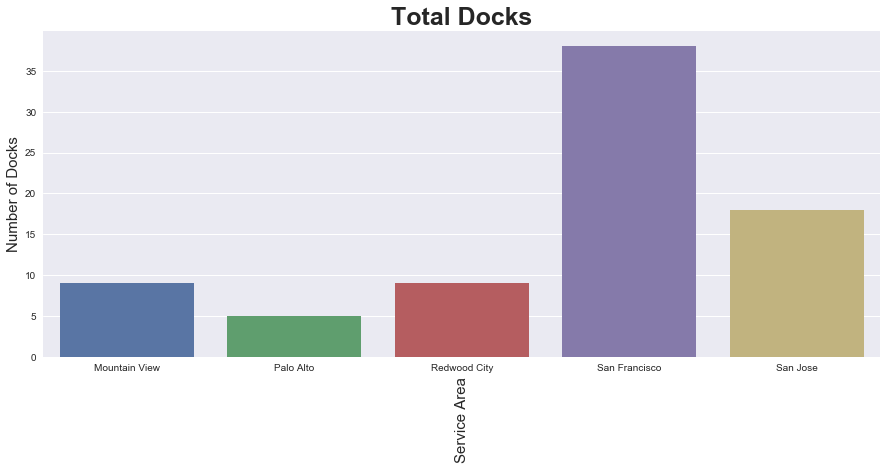

In [19]:
docks_by_service_area = station_data.groupby('landmark')['dock_count'].count().to_frame()
plt.subplots(figsize=(15,6))
ax = sns.barplot(x=docks_by_service_area.index, y='dock_count', data=docks_by_service_area)
ax.set_title('Total Docks', size=TITLE_FONT_SIZE, weight='bold')
ax.set_xlabel('Service Area', size=LABEL_FONT_SIZE, rotation=90)
ax.set_xticklabels(sorted(pd.unique(station_data.landmark)), rotation=0)
ax.set_ylabel('Number of Docks', size=LABEL_FONT_SIZE)
plt.show()

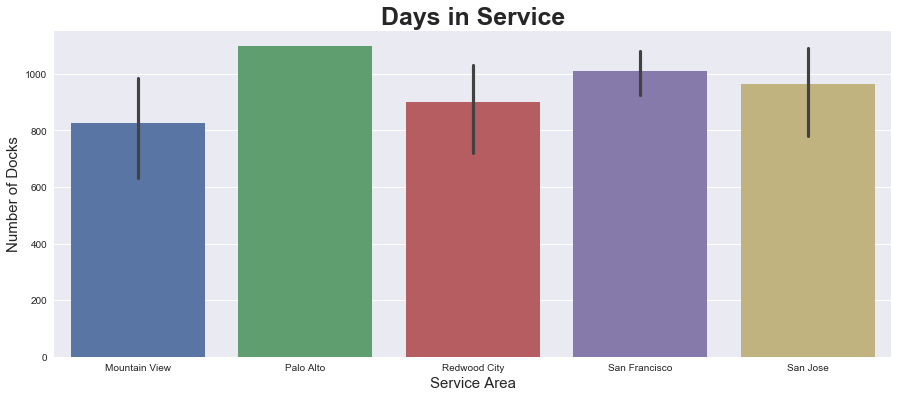

In [20]:
plt.subplots(figsize=(15,6))
ax = sns.barplot(x='landmark', y='days_in_service', data=station_data)
ax.set_title('Days in Service', size=TITLE_FONT_SIZE, weight='bold')
ax.set_xlabel('Service Area', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Docks', size=LABEL_FONT_SIZE)
plt.show()

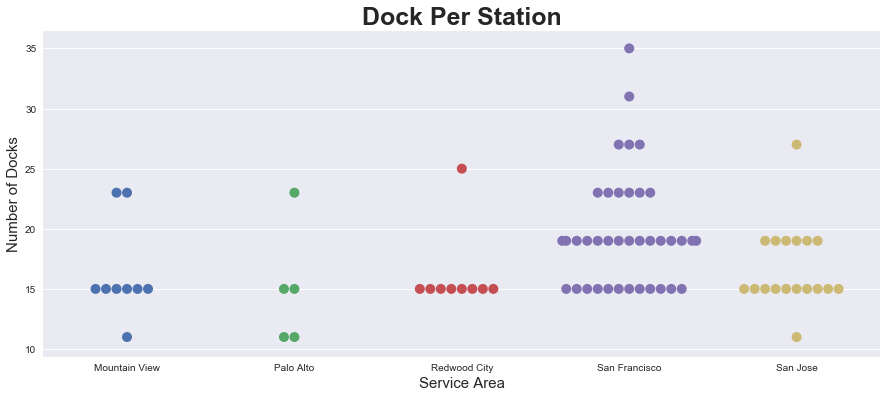

In [21]:
plt.subplots(figsize=(15,6))
ax = sns.swarmplot(x='landmark', y='dock_count', data=station_data, s=10)
ax.set_title('Dock Per Station', size=TITLE_FONT_SIZE, weight='bold')
ax.set_xlabel('Service Area', size=LABEL_FONT_SIZE)
ax.set_ylabel('Number of Docks', size=LABEL_FONT_SIZE)
plt.show()

In [22]:
station_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 10 columns):
station_id            79 non-null int64
name                  79 non-null object
lat                   79 non-null float64
long                  79 non-null float64
dock_count            79 non-null int64
landmark              79 non-null category
first_service_date    79 non-null datetime64[ns]
last_service_date     79 non-null datetime64[ns]
zip_code              79 non-null object
days_in_service       79 non-null int64
dtypes: category(1), datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 5.9+ KB


In [23]:
station_data[:45]

,station_id,name,lat,long,dock_count,landmark,first_service_date,last_service_date,zip_code,days_in_service
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-29,2016-08-31,95113,1098
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-29,2016-08-31,95113,1098
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-29,2016-08-31,95113,1098
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-29,2016-08-31,95113,1098
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-29,2016-08-31,95113,1098
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,2013-08-29,2016-08-31,95113,1098
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,2013-08-29,2016-08-31,95113,1098
7,9,Japantown,37.348742,-121.894715,15,San Jose,2013-08-29,2016-08-31,95113,1098
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,2013-08-29,2016-08-31,95113,1098
9,11,MLK Library,37.335885,-121.885660,19,San Jose,2013-08-29,2016-08-31,95113,1098


In [24]:
station_data[45:]

,station_id,name,lat,long,dock_count,landmark,first_service_date,last_service_date,zip_code,days_in_service
45,51,Embarcadero at Folsom,37.791464,-122.391034,19,San Francisco,2013-08-29,2016-08-31,94107,1098
46,54,Embarcadero at Bryant,37.787152,-122.388013,15,San Francisco,2013-08-29,2016-08-31,94107,1098
47,55,Temporary Transbay Terminal (Howard at Beale),37.789756,-122.394643,23,San Francisco,2013-08-29,2016-08-31,94107,1098
48,56,Beale at Market,37.792251,-122.397086,19,San Francisco,2013-08-29,2016-08-31,94107,1098
49,57,5th at Howard,37.781752,-122.405127,15,San Francisco,2013-08-29,2016-08-31,94107,1098
50,58,San Francisco City Hall,37.778650,-122.418235,19,San Francisco,2013-08-29,2016-08-31,94107,1098
51,59,Golden Gate at Polk,37.781332,-122.418603,23,San Francisco,2013-08-29,2016-08-31,94107,1098
52,60,Embarcadero at Sansome,37.804770,-122.403234,15,San Francisco,2013-08-29,2016-08-31,94107,1098
53,61,2nd at Townsend,37.780526,-122.390288,27,San Francisco,2013-08-29,2016-08-31,94107,1098
54,62,2nd at Folsom,37.785299,-122.396236,19,San Francisco,2013-08-29,2016-08-31,94107,1098


## Write to File

In [25]:
station_data.to_csv('../clean_data/station_data_cleaned_final.csv', encoding='utf-8')

## Quick Reference to Special Stations

> Stations that kept their station_id but other information changed, mostly location, one is dock count

> All Stations in Redwood City were closed on June 30, 2016

In [26]:
specials = station_data[station_data.duplicated(subset=['station_id'], keep=False)]
specials.head(20)

,station_id,name,lat,long,dock_count,landmark,first_service_date,last_service_date,zip_code,days_in_service
14,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,2013-08-29,2016-06-30,94063,1036
15,21,Sequoia Hospital,37.479303,-122.253755,15,Redwood City,2015-09-16,2016-06-30,94063,288
19,25,Stanford in Redwood City,37.485370,-122.203288,15,Redwood City,2013-08-29,2016-06-30,94063,1036
20,25,Broadway at Main,37.486725,-122.225551,15,Redwood City,2014-09-01,2016-08-04,94063,703
25,30,Evelyn Park and Ride,37.390277,-122.066553,15,Mountain View,2013-08-29,2015-09-28,94041,760
26,30,Middlefield Light Rail Station,37.395337,-122.052476,15,Mountain View,2015-09-28,2016-08-31,94041,338
29,33,Rengstorff Avenue / California Street,37.400241,-122.099076,15,Mountain View,2013-08-29,2015-09-16,94041,748
30,33,Charleston Park/ North Bayshore Area,37.420909,-122.080623,15,Mountain View,2015-09-16,2016-08-31,94041,350
65,73,Grant Avenue at Columbus Avenue,37.798522,-122.407245,15,San Francisco,2013-08-29,2015-05-19,94107,628
66,73,Grant Avenue at Columbus Avenue,37.797900,-122.405942,19,San Francisco,2015-05-19,2016-08-31,94107,470


In [27]:
redwood_city = station_data[station_data.landmark == 'Redwood City']
redwood_city.head(20)

,station_id,name,lat,long,dock_count,landmark,first_service_date,last_service_date,zip_code,days_in_service
14,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,2013-08-29,2016-06-30,94063,1036
15,21,Sequoia Hospital,37.479303,-122.253755,15,Redwood City,2015-09-16,2016-06-30,94063,288
16,22,Redwood City Caltrain Station,37.486078,-122.232089,25,Redwood City,2013-08-29,2016-06-30,94063,1036
17,23,San Mateo County Center,37.488501,-122.231061,15,Redwood City,2013-08-29,2016-07-05,94063,1041
18,24,Redwood City Public Library,37.484219,-122.227424,15,Redwood City,2013-08-29,2016-07-05,94063,1041
19,25,Stanford in Redwood City,37.485370,-122.203288,15,Redwood City,2013-08-29,2016-06-30,94063,1036
20,25,Broadway at Main,37.486725,-122.225551,15,Redwood City,2014-09-01,2016-08-04,94063,703
21,26,Redwood City Medical Center,37.487682,-122.223492,15,Redwood City,2013-08-29,2016-08-04,94063,1071
73,83,Mezes Park,37.491269,-122.236234,15,Redwood City,2014-02-20,2016-06-30,94063,861


## Quick Preview All Station Data

In [28]:
station_data.head(5)

,station_id,name,lat,long,dock_count,landmark,first_service_date,last_service_date,zip_code,days_in_service
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,2013-08-29,2016-08-31,95113,1098
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,2013-08-29,2016-08-31,95113,1098
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,2013-08-29,2016-08-31,95113,1098
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,2013-08-29,2016-08-31,95113,1098
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,2013-08-29,2016-08-31,95113,1098
